In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from research_utils.database.database import Database

## Percentage of Crowd Sourced Reqs

In [2]:
database = Database()

In [3]:
sql = """
SELECT CAST(a.crowd AS DECIMAL)/b.total as crowd_pct, a.package_id, c.package_name, b.total
FROM(
	SELECT COUNT(*) as crowd, package_id
	FROM open_source.issue_contributors
	WHERE commit_pct <= {pct}
	GROUP BY package_id
) a
INNER JOIN (
	SELECT COUNT(*) as total, package_id
	FROM open_source.issue_contributors
	GROUP BY package_id
) b
ON a.package_id = b.package_id
INNER JOIN open_source.packages c
ON a.package_id = c.id
WHERE b.total < 1000
"""

(0, 1)

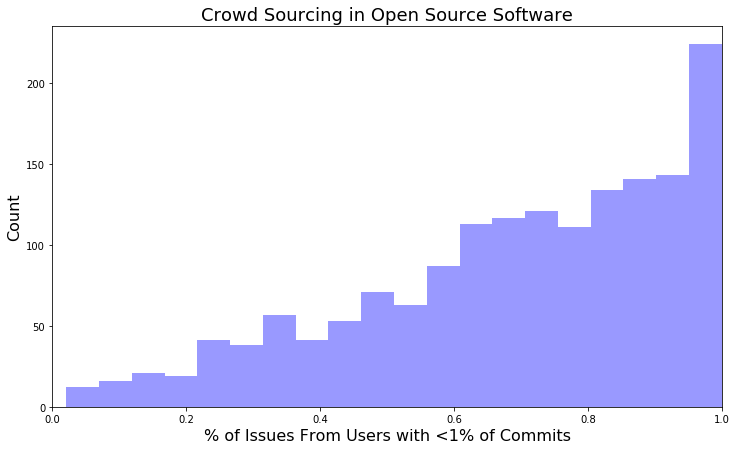

In [4]:
df = pd.read_sql(sql.format(pct=0.01), database.connection)
plt.figure(figsize=(12, 7))
sns.distplot(df['crowd_pct'], kde=False, color='blue', bins=20)
plt.title('Crowd Sourcing in Open Source Software', fontsize=18)
plt.xlabel('% of Issues From Users with <1% of Commits', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xlim([0,1])

(0, 1)

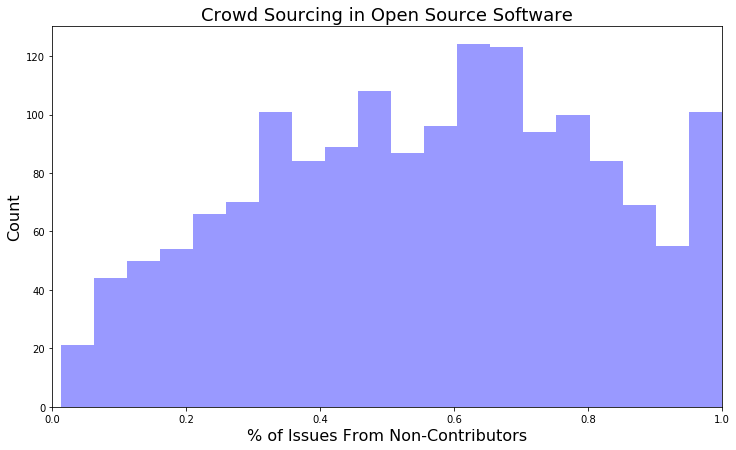

In [5]:
df = pd.read_sql(sql.format(pct=0.0), database.connection)
plt.figure(figsize=(12, 7))
sns.distplot(df['crowd_pct'], kde=False, color='blue', bins=20)
plt.title('Crowd Sourcing in Open Source Software', fontsize=18)
plt.xlabel('% of Issues From Non-Contributors', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xlim([0,1])

(0, 1)

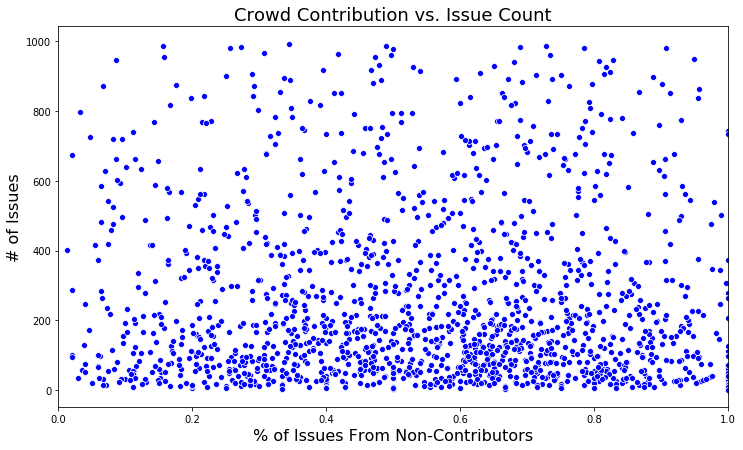

In [6]:
df = pd.read_sql(sql.format(pct=0.00), database.connection)
plt.figure(figsize=(12, 7))
sns.scatterplot(x=df['crowd_pct'], y=df['total'], color='blue')
plt.title('Crowd Contribution vs. Issue Count', fontsize=18)
plt.xlabel('% of Issues From Non-Contributors', fontsize=16)
plt.ylabel('# of Issues', fontsize=16)
plt.xlim([0,1])

### Number of Years Projects Have Been Active

In [7]:
sql = """
select count(*) as total, yr
from(
select extract(year from AGE(min(created_at))) as yr
from open_source.issues
group by package_id
) x 
group by yr
order by yr desc
"""

In [11]:
df

,total,yr
0,1,15.0
1,9,10.0
2,46,9.0
3,156,8.0
4,230,7.0
5,322,6.0
6,349,5.0
7,324,4.0
8,212,3.0
9,139,2.0
